In [122]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import random

import importlib
import dicom_utils

importlib.reload(dicom_utils)
from dicom_utils import DicomUtils

DATA_PATH='/home/sravya/data/DicomSegmentation/final_data/'
CONTOUR_PATH=DATA_PATH+ 'contourfiles/'

# Preprocess

In [123]:
#Create DicomUtils object
du = DicomUtils(DATA_PATH)

# Explore sizes of the data

In [124]:
ocfiles = du.get_ocfiles()#Can use num(=8) to restrict the number of files
len(ocfiles) # We have 46 samples which have o-contour, i-contour and dicom associated with it

46

In [125]:
dicom_sizes = []
for file in ocfiles:
    dicom_arr, _,_,_,_ = du.get_dicom_and_mask(file)
    dicom_sizes.append(dicom_arr.shape)

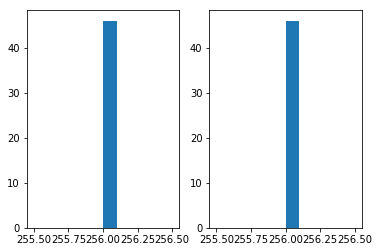

In [126]:
x = [size[0] for size in dicom_sizes]
y = [size[1] for size in dicom_sizes]
f, axarr = plt.subplots(1, 2)
axarr[0].hist(x)
axarr[1].hist(y)
plt.show()

In [127]:
#So all the dicoms are of shape (256,256)

# Visualize i-contours and o-contours

In [128]:
# For demo we only use a subset of samples
ocfiles = ocfiles[:8]

In [129]:
dicom_arr, imask, ipolygon, omask, opolygon = du.get_dicom_and_mask(ocfiles[0])

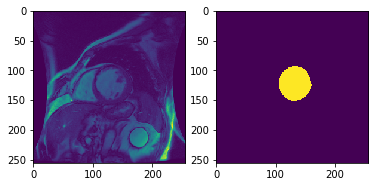

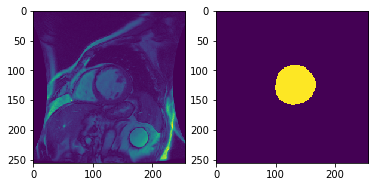

(None, None)

In [130]:
du.visualize_sidebyside(dicom_arr, imask), du.visualize_sidebyside(dicom_arr, omask)

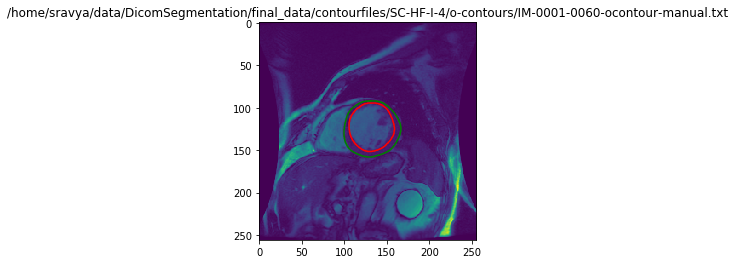

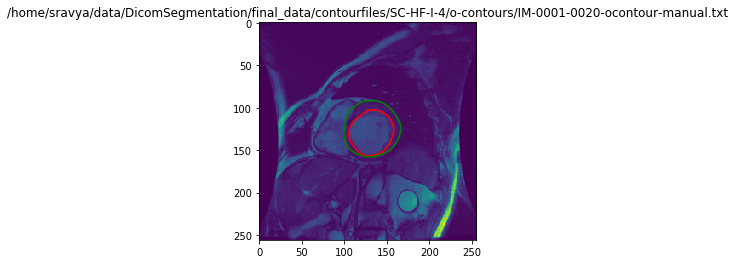

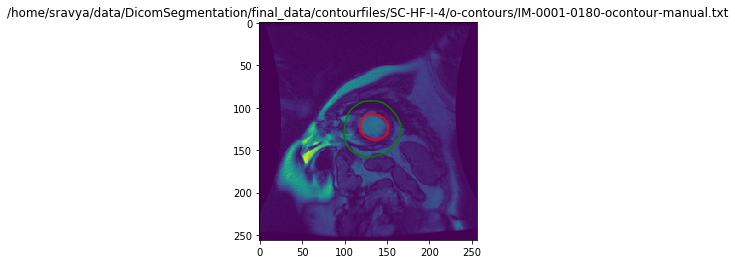

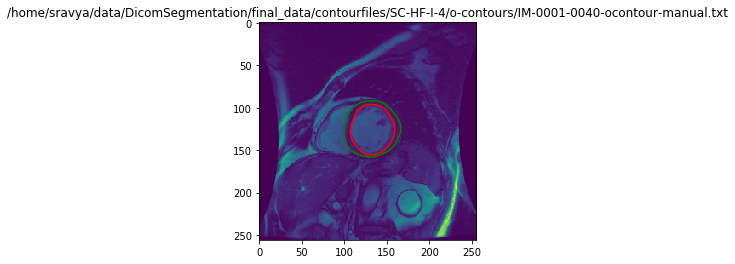

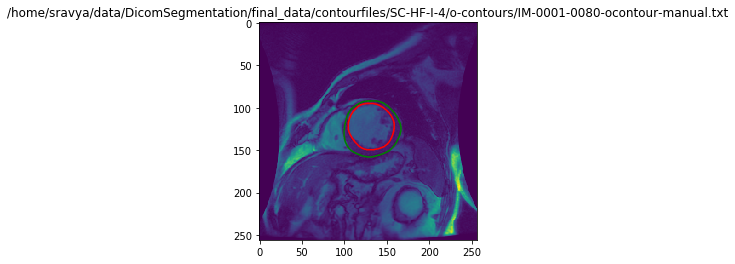

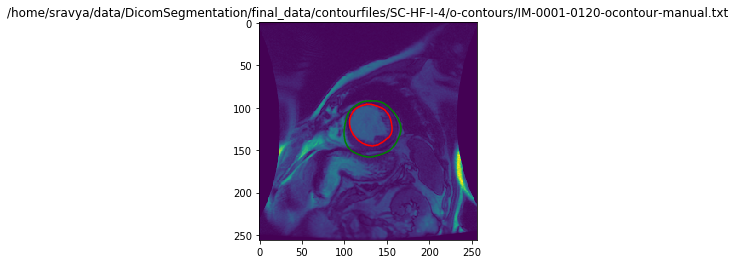

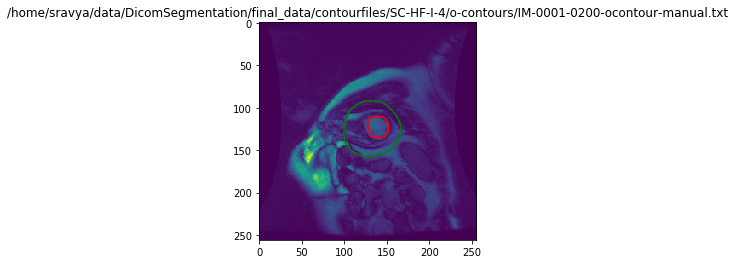

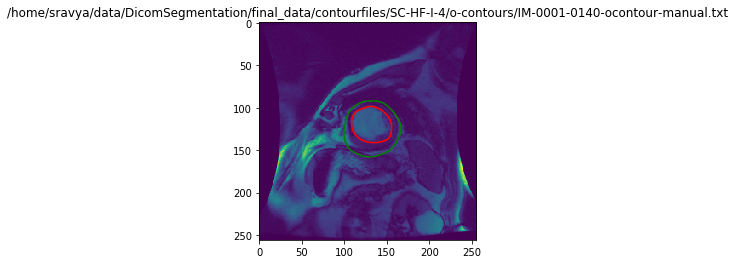

In [131]:
#Visualize overlayes for a few random samples for a visual sanity check
for file in ocfiles:
    dicom_arr, imask, ipolygon, omask, oplygon = du.get_dicom_and_mask(file)
    du.visualize_overlay(file, dicom_arr, [ipolygon, opolygon])

# Use Data Generator

In [132]:
gen = du.data_generator(8)
try:
    while(1):
        dicoms,imasks,omasks = next(gen)
        print(dicoms.shape, imasks.shape, omasks.shape)
except StopIteration:
    pass
gen.close()

Starting data generator
(2048, 256) (2048, 256) (2048, 256)
(2048, 256) (2048, 256) (2048, 256)
(2048, 256) (2048, 256) (2048, 256)
(2048, 256) (2048, 256) (2048, 256)
(2048, 256) (2048, 256) (2048, 256)


# Phase 2 task 2 - Analyze intensities and thresholding

For every sample we plot the following:
1. Blood: The dicom area inside i-contour, cropped and everything else set to zero
2. Muscle: The dicom area inside o-contour and outside i-contour, cropped and everything else set to zero
3. Muscle, Blood: Histogram of intensities for values in muscle and blood pool represented seprately on the same plot
4. Inside o-contour: Histogram of intensities for entire dicom area inside o-contour (Blood + Muscle)
5. Muscle dicom area detected by thresholding: We find the thresholding value by getting the lowest point between the  bimodal distribution of o-contour intensities. Seems like this is doing a reasonable job. Much better than a static threshold value for all samples. Further processing can be explored to reconstruct a 'circle' to get rid of most false positives inside the i-contour area.

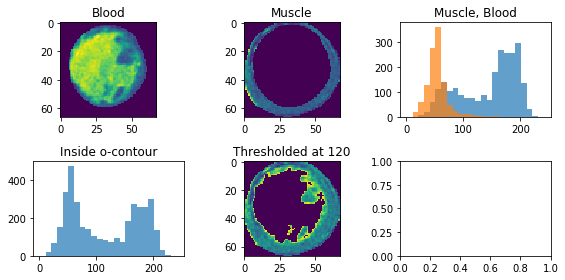

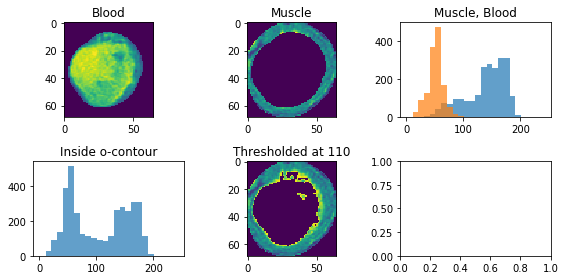

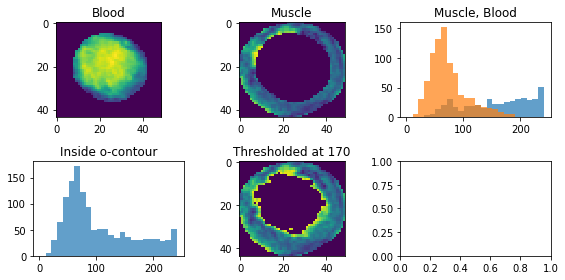

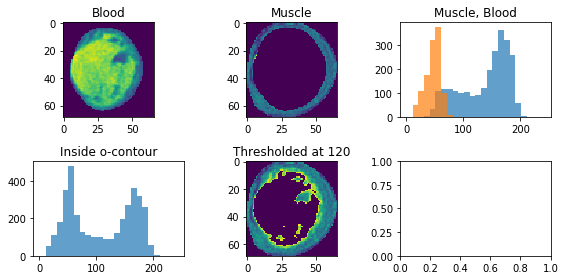

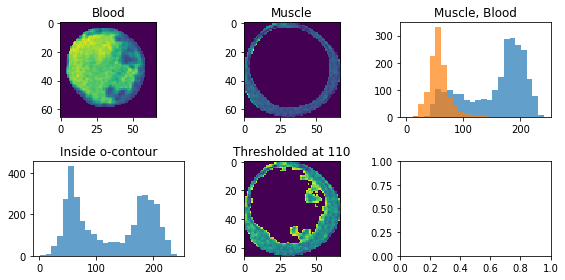

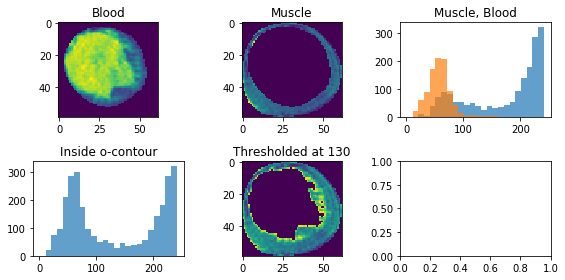

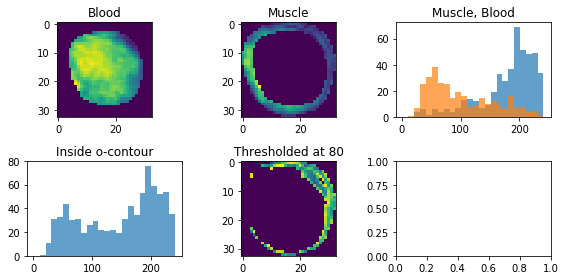

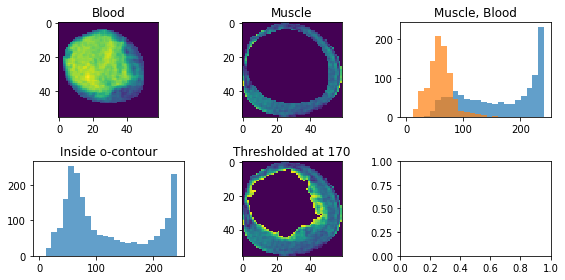

In [133]:
for ocfile in ocfiles:
    du.analyze_intensity_thresholding(ocfile)